# Importaciones

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
#metricas
from sklearn.metrics import silhouette_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
from scipy.spatial.distance import cdist

# Análisis de la data

In [ ]:
df = pd.read_csv('alzheimer.csv')
df

,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,Nondemented
2,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,Demented
3,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,Demented
4,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,Demented
...,...,...,...,...,...,...,...,...,...,...
368,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,Demented
369,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,Demented
370,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
371,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


### **Variables**
#### **M/F:** Género del sujeto (M para masculino, F para femenino).
#### **Age:** Edad del sujeto en el momento del estudio.
#### **Education:** Nivel educativo del sujeto medido en años de educación.
#### **SES (Socioeconomic Status):** Estatus socioeconómico del sujeto, medido en una escala cualitativa.
#### **MMSE (Mini-Mental State Examination):** Puntuación en una prueba estandarizada que evalúa el estado mental del sujeto. Se utiliza comúnmente para diagnosticar demencia.
#### **CDR (Clinical Dementia Rating):** Escala que mide la severidad de la demencia en el sujeto, desde 0 (sin demencia) hasta 3 (demencia severa).
#### **eTIV (Estimated Total Intracranial Volume):** Volumen total intracraneal estimado, medido en milímetros cúbicos.
#### **nWBV (Normalized Whole Brain Volume):** Volumen total del cerebro normalizado, expresado como un porcentaje del volumen intracraneal total.
#### **ASF (Atlas Scaling Factor):** Factor de escala utilizado para normalizar los volúmenes cerebrales según un atlas de referencia.

### Variable de trabajo
#### Group: Indica la clasificación del sujeto en uno de los tres grupos:

#### Demented: Personas diagnosticadas con demencia.
#### No Demented: Personas diagnosticadas sin demencia.
#### Converted: Personas que inicialmente no tenían demencia, pero que desarrollaron la enfermedad durante el seguimiento.



In [ ]:
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M/F     373 non-null    object 
 1   Age     373 non-null    int64  
 2   EDUC    373 non-null    int64  
 3   SES     354 non-null    float64
 4   MMSE    371 non-null    float64
 5   CDR     373 non-null    float64
 6   eTIV    373 non-null    int64  
 7   nWBV    373 non-null    float64
 8   ASF     373 non-null    float64
 9   Group   373 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


# Tratamiento de los datos

In [ ]:
# Obtener una Serie que indica cuántos valores nulos hay en cada columna
null_counts = df.isnull().sum()

# Filtrar las columnas que tienen al menos un valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Imprimir la lista de columnas y la cantidad de valores nulos en cada una
for column, count in columns_with_nulls.items():
    print(f"Columna '{column}' tiene {count} valores nulos.")

Columna 'SES' tiene 19 valores nulos.
Columna 'MMSE' tiene 2 valores nulos.


In [ ]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

M/F      0.000000
Age      0.000000
EDUC     0.000000
SES      5.093834
MMSE     0.536193
CDR      0.000000
eTIV     0.000000
nWBV     0.000000
ASF      0.000000
Group    0.000000
dtype: float64


In [ ]:
df = df.fillna(df.mean(numeric_only=True)) #Valores nulos El comando df.fillna(df.mean()) se utiliza para rellenar los valores faltantes (NaN) en un DataFrame df con la media de cada columna correspondiente.

In [ ]:
# Obtener una Serie que indica cuántos valores nulos hay en cada columna
null_counts = df.isnull().sum()

# Filtrar las columnas que tienen al menos un valor nulo
columns_with_nulls = null_counts[null_counts > 0]

# Imprimir la lista de columnas y la cantidad de valores nulos en cada una
for column, count in columns_with_nulls.items():
    print(f"Columna '{column}' tiene {count} valores nulos.")

### Para realizar el algoritmo PCA, se debe considerar que se deben tener valores numericos debido a que utiliza conceptos de álgebra lineal para los cuales no estan contemplados valores categóricos.

### Para este caso se realizará un "one hot enconding" para la variable categorica M/F

In [ ]:
# Lista de columnas categóricas que se quiere codificar
categorical_columns = ['M/F']

# Aplicar One Hot Encoding a las columnas categóricas
df = pd.get_dummies(df, columns=categorical_columns)

print('ONE HOT ENCODING TERMINADO')
print(df.head())

ONE HOT ENCODING TERMINADO
   Age  EDUC       SES  MMSE  CDR  eTIV   nWBV    ASF        Group  M/F_F  \
0   87    14  2.000000  27.0  0.0  1987  0.696  0.883  Nondemented  False   
1   88    14  2.000000  30.0  0.0  2004  0.681  0.876  Nondemented  False   
2   75    12  2.460452  23.0  0.5  1678  0.736  1.046     Demented  False   
3   76    12  2.460452  28.0  0.5  1738  0.713  1.010     Demented  False   
4   80    12  2.460452  22.0  0.5  1698  0.701  1.034     Demented  False   

   M/F_M  
0   True  
1   True  
2   True  
3   True  
4   True  


# Correlaciones

#### Se realizara una copia del dataframe para una prelimpieza de nuestro dataframe de trabajo, esto se realiza para ver las correlaciones entre las variable con respecto a la variable de trabajo group para lo cual se realiza un labelEncoder en la variable Group para observar de mejor manera las correlaciones.

In [ ]:
df2 = df.copy()

In [ ]:
encoder = LabelEncoder()
df2['Group'] = encoder.fit_transform(df['Group'])

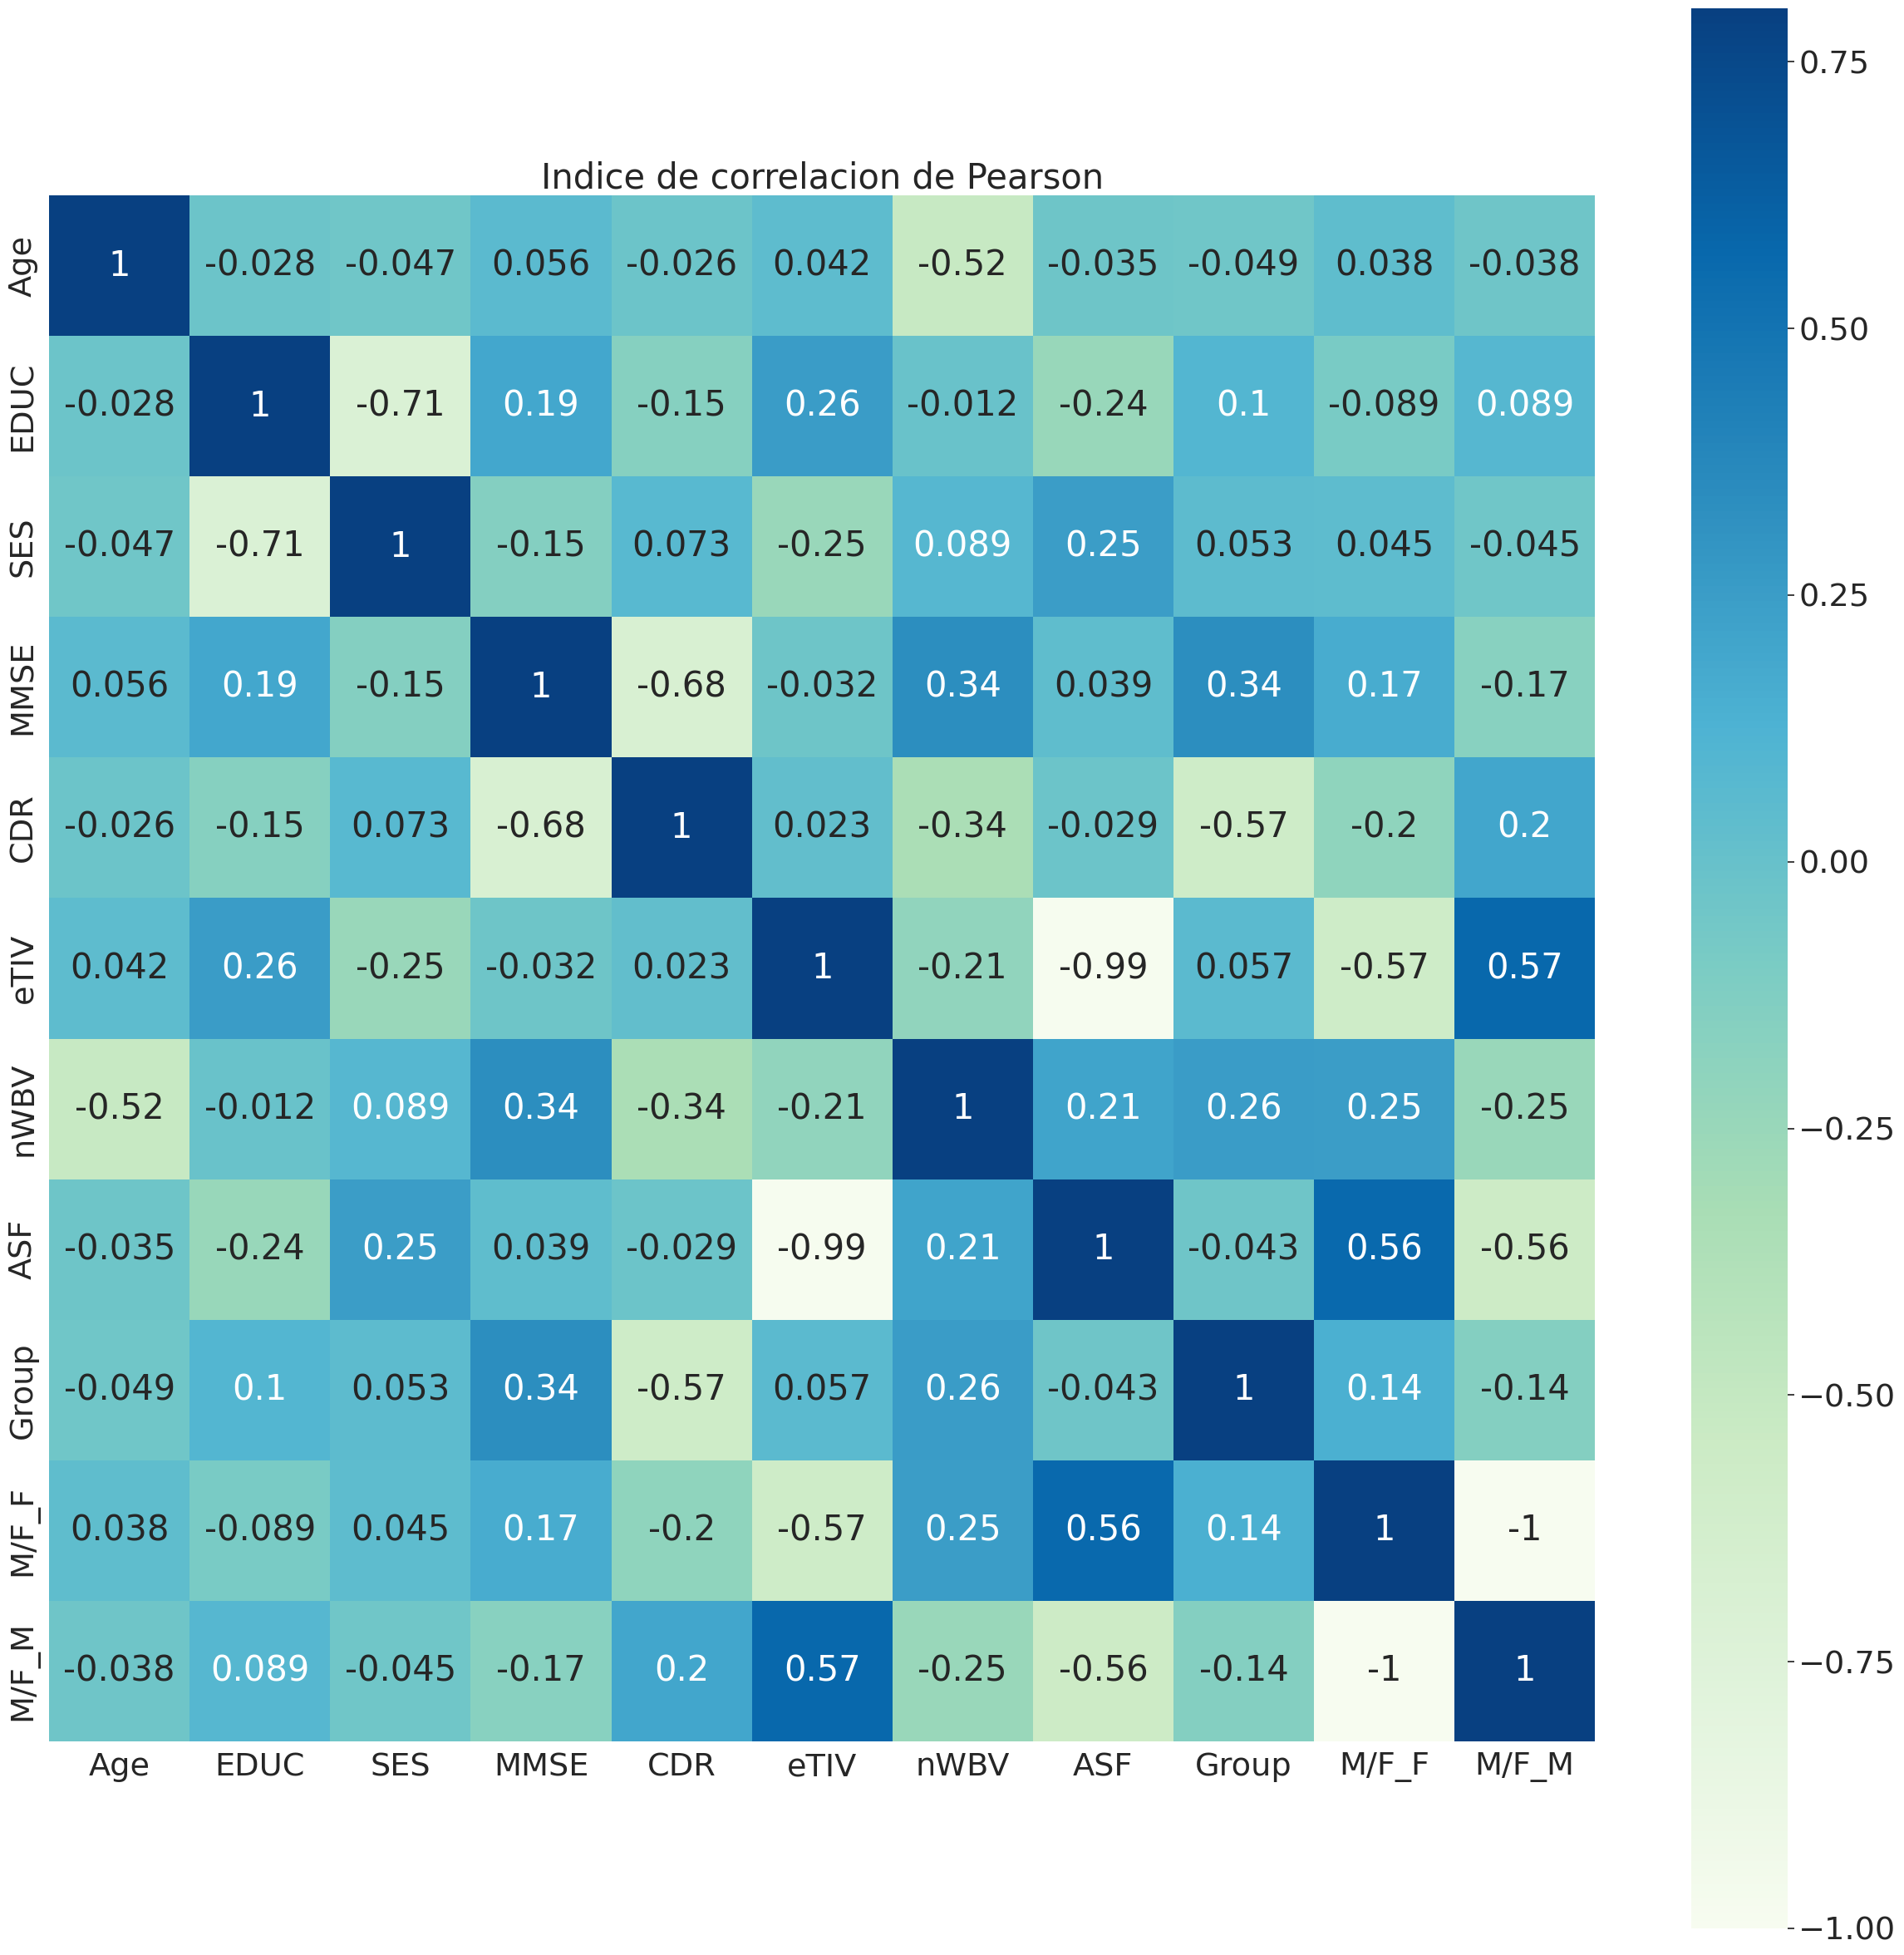

In [ ]:
sns.set(style="whitegrid",font_scale=2.5)
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True)
plt.title('Indice de correlacion de Pearson')
plt.show()

#### Se eliminaran las variables "Age", "SES", "eTIV", "ASF" debido a que en el gráfico de correlacion de pearson muestra que dichas variables no son influyentes dentro de la data para lo cual existe la posibilidad de que generen ruido.

In [ ]:
df = df.drop(columns=['Age'])
df = df.drop(columns=['SES'])
df = df.drop(columns=['eTIV'])
df = df.drop(columns=['ASF'])

In [ ]:
df2 = df2.drop(columns=['Age'])
df2 = df2.drop(columns=['SES'])
df2 = df2.drop(columns=['eTIV'])
df2 = df2.drop(columns=['ASF'])

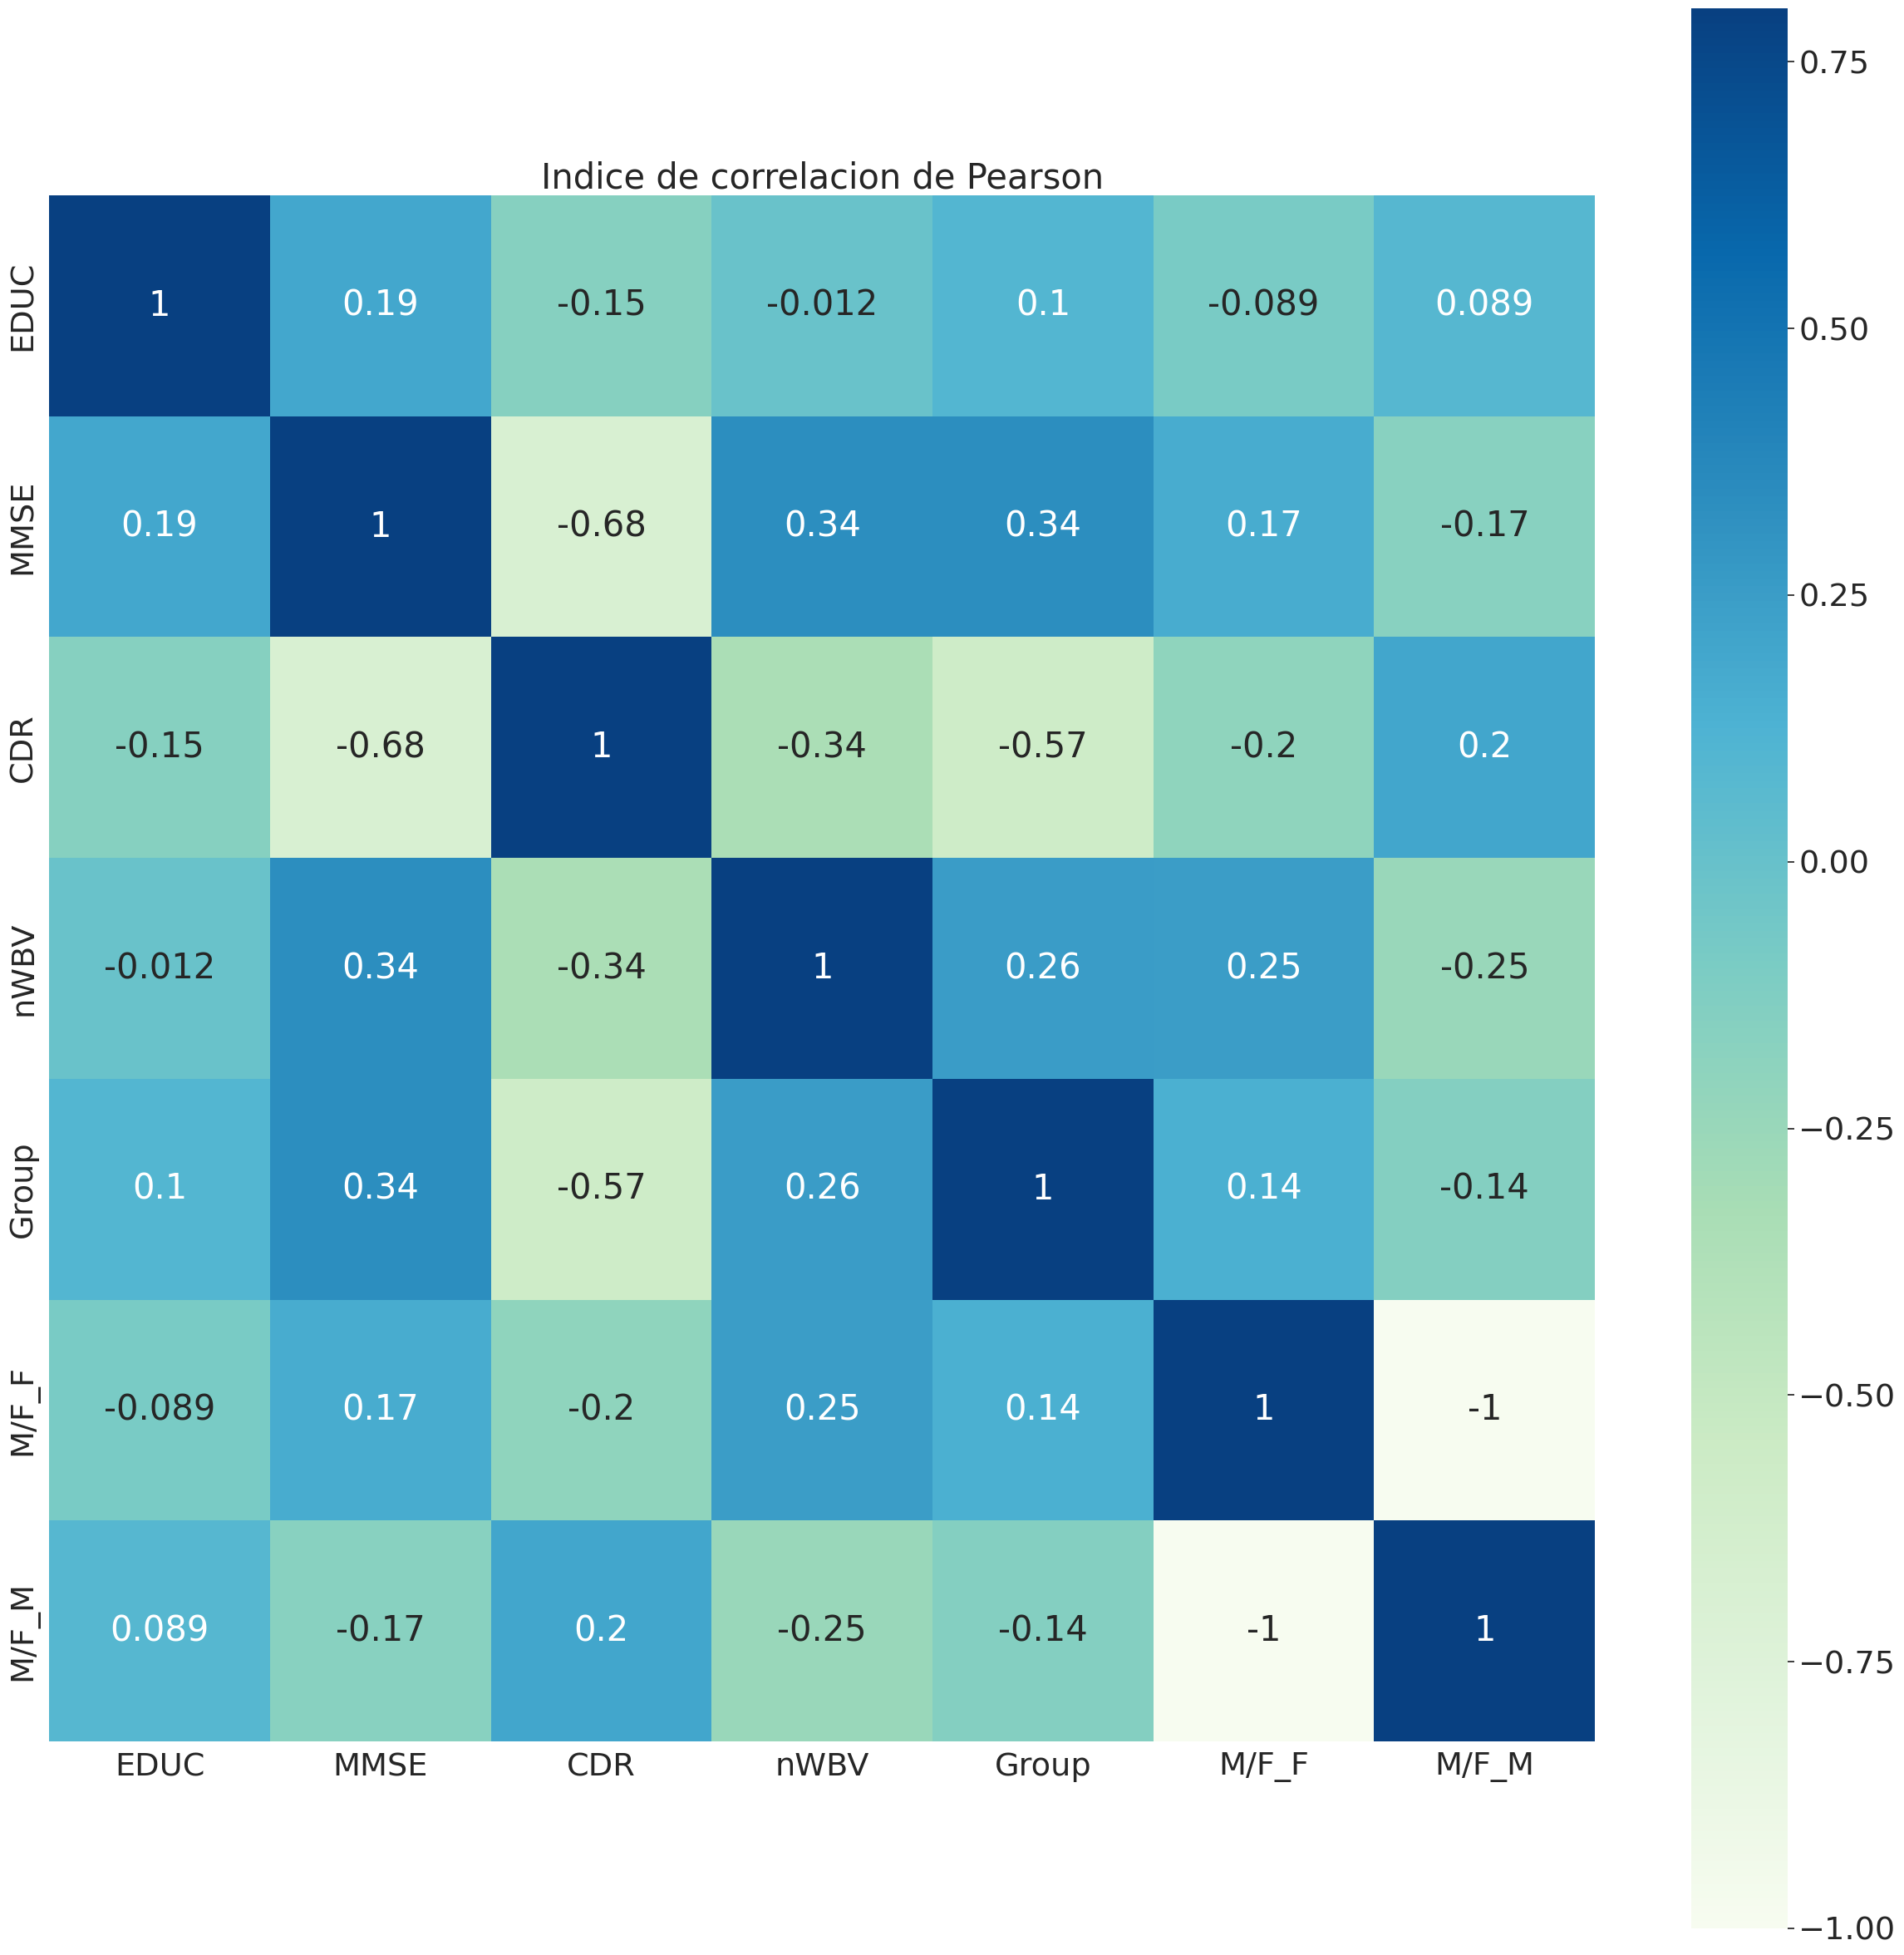

In [ ]:
sns.set(style="whitegrid",font_scale=2.5)
plt.figure(figsize=(30,30))
sns.heatmap(df2.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True)
plt.title('Indice de correlacion de Pearson')
plt.show()

## Seleccion de variables

In [ ]:
set_var=set(df.select_dtypes(exclude='O').columns)
set_var

{'CDR', 'EDUC', 'M/F_F', 'M/F_M', 'MMSE', 'nWBV'}

In [ ]:
set_var_list = list(set_var)
train_df = df[set_var_list].copy()

In [ ]:
train_df.head()

,M/F_M,EDUC,CDR,nWBV,MMSE,M/F_F
0,True,14,0.0,0.696,27.0,False
1,True,14,0.0,0.681,30.0,False
2,True,12,0.5,0.736,23.0,False
3,True,12,0.5,0.713,28.0,False
4,True,12,0.5,0.701,22.0,False


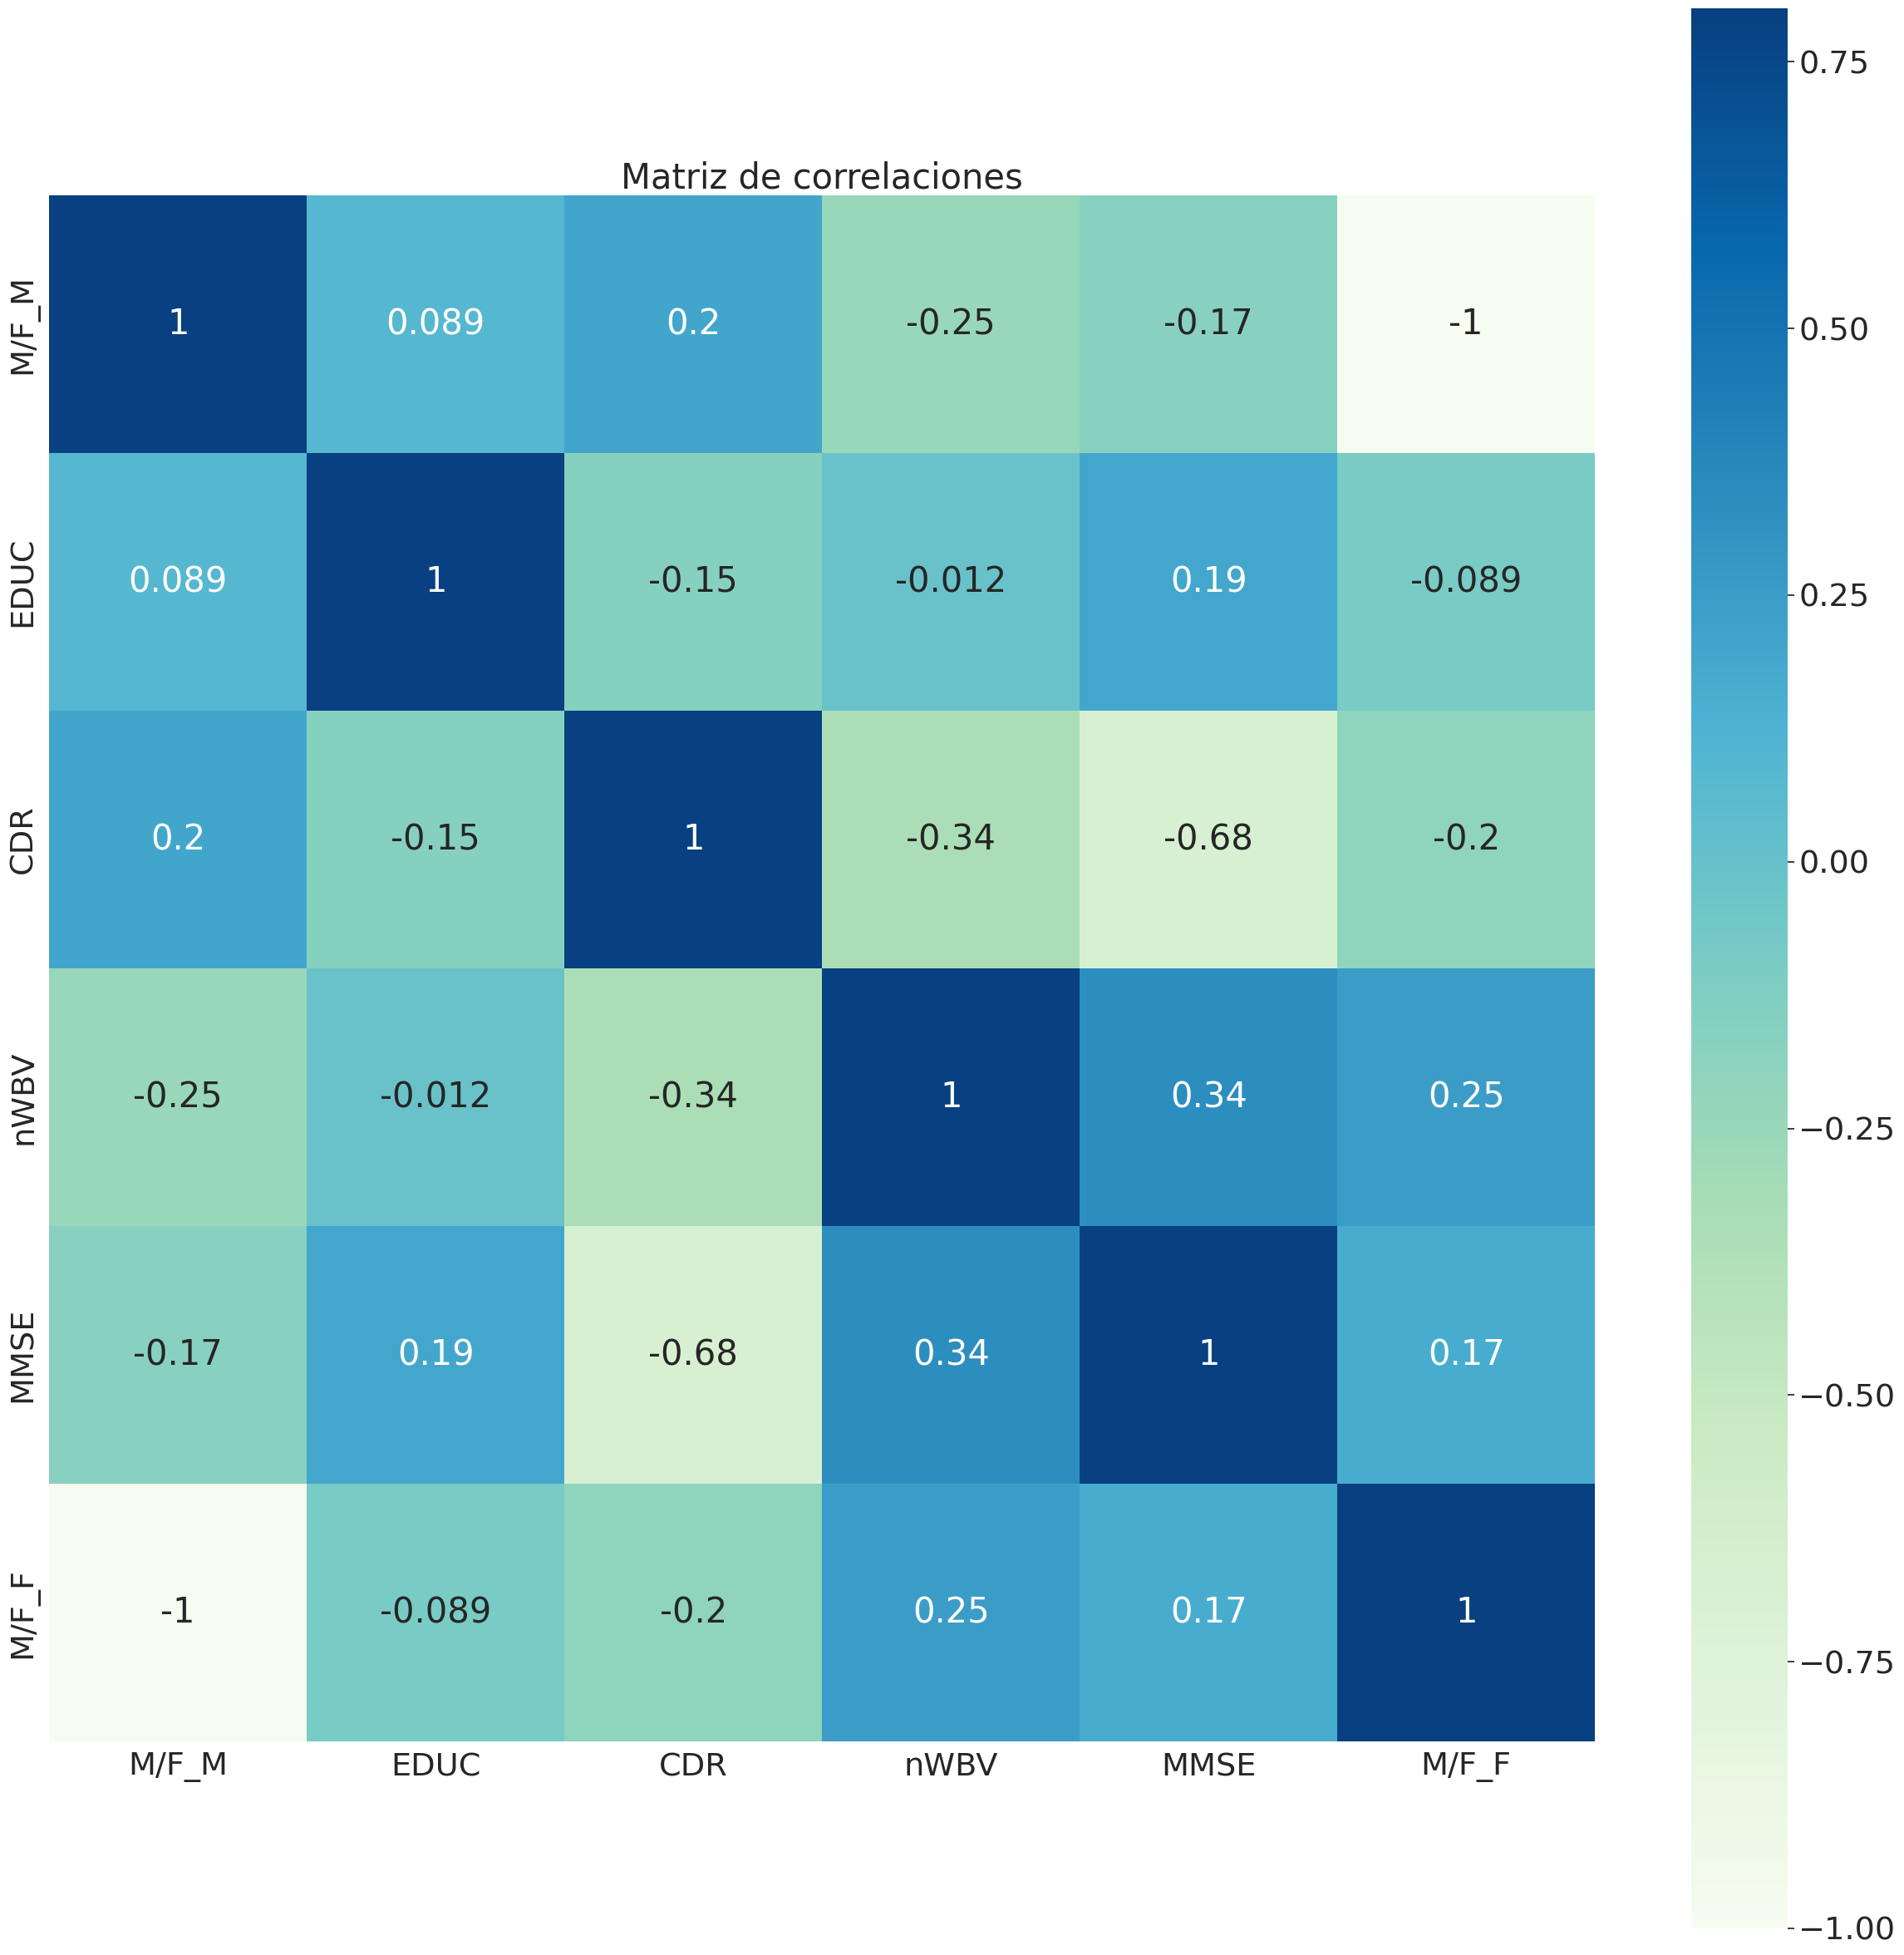

In [ ]:
sns.set(style="whitegrid",font_scale=2.5)
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(),vmax=0.8,square=True,cmap='GnBu',linecolor='b',annot=True)
plt.title('Matriz de correlaciones')
plt.show()

# Escalado de variables


In [ ]:
std=StandardScaler()
std_train=std.fit_transform(train_df)
std_train

array([[ 1.15379808, -0.20813199, -0.77765291, -0.90516867, -0.09331531,
        -1.15379808],
       [ 1.15379808, -0.20813199, -0.77765291, -1.30964265,  0.72447947,
        -1.15379808],
       [ 1.15379808, -0.90439416,  0.55905002,  0.17342861, -1.18370835,
        -1.15379808],
       ...,
       [-0.86670278, -0.55626308, -0.77765291,  1.92614919,  0.72447947,
         0.86670278],
       [-0.86670278, -0.55626308, -0.77765291,  1.79132453,  0.72447947,
         0.86670278],
       [-0.86670278, -0.55626308, -0.77765291,  1.92614919,  0.72447947,
         0.86670278]])

# Algoritmo PCA

#### Algoritmo PCA (Principal Component Analysis)
#### El Análisis de Componentes Principales (PCA) es un método estadístico utilizado para reducir la dimensionalidad de un conjunto de datos mientras se conserva la mayor cantidad posible de variación presente en el conjunto original. Se utiliza principalmente para simplificar los datos, reducir el ruido y facilitar la visualización y análisis.

In [ ]:
pca=PCA().fit(std_train)

In [ ]:
ar_varianza=pca.explained_variance_ratio_
ar_varianza

array([4.10924175e-01, 2.66613848e-01, 1.54588742e-01, 1.14826632e-01,
       5.30466039e-02, 5.05847897e-32])

In [ ]:
pca.explained_variance_#contienes los valores propios

array([2.47217286e+00, 1.60398331e+00, 9.30025817e-01, 6.90811832e-01,
       3.19135214e-01, 3.04324622e-31])

In [ ]:
pca.components_ #contiene los vectores propios

array([[ 5.14971918e-01, -3.08921679e-02,  4.17197061e-01,
        -3.66675539e-01, -4.00186436e-01, -5.14971918e-01],
       [-4.37612139e-01, -3.97831561e-01,  4.46580121e-01,
        -1.59961531e-01, -4.83425056e-01,  4.37612139e-01],
       [-2.05111335e-01,  8.33791264e-01,  1.03886751e-01,
        -4.52877708e-01, -6.89937156e-02,  2.05111335e-01],
       [ 3.23437081e-02,  3.79218071e-01,  3.51702114e-01,
         7.96685643e-01, -3.09352601e-01, -3.23437081e-02],
       [ 1.35190648e-02,  4.19702875e-02, -7.01445631e-01,
         1.24548982e-02, -7.11120149e-01, -1.35190648e-02],
       [-7.07106781e-01, -0.00000000e+00,  1.11022302e-16,
         2.77555756e-17,  1.38777878e-17, -7.07106781e-01]])

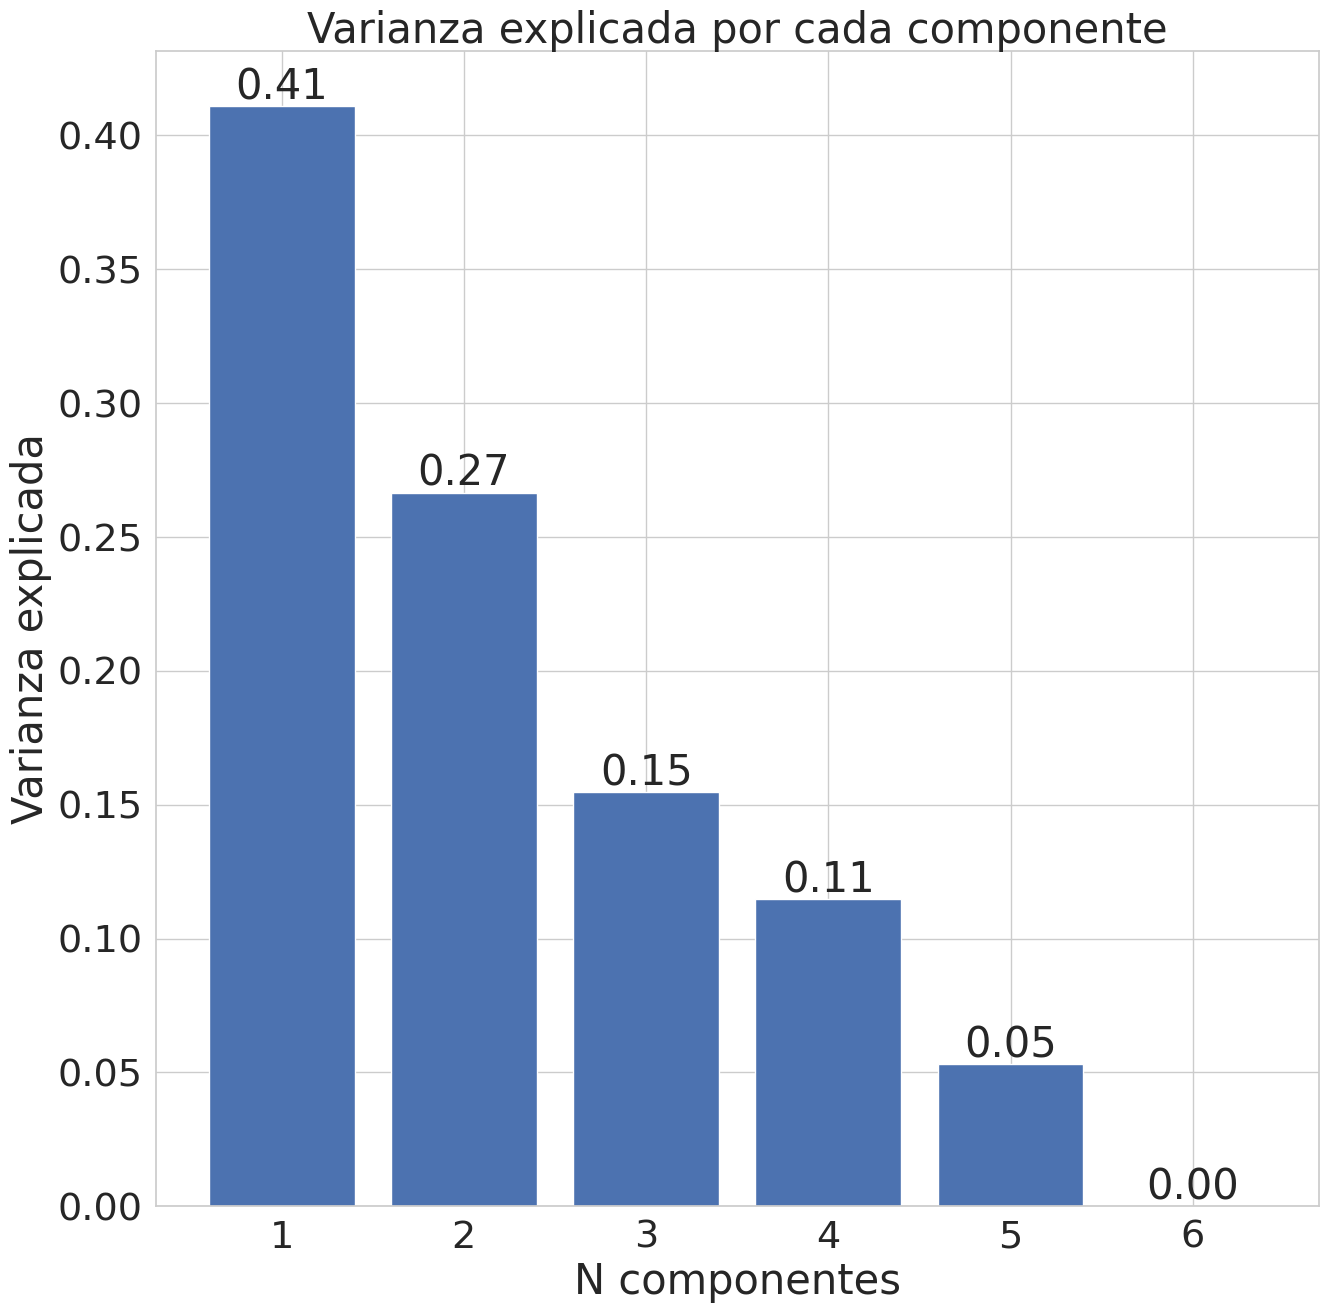

In [ ]:
# Crear la gráfica de barras
plt.figure(figsize=(15, 15))
plt.bar(range(1, len(ar_varianza) + 1), ar_varianza, tick_label=range(1, len(ar_varianza) + 1))
plt.title('Varianza explicada por cada componente')
plt.xlabel('N componentes')
plt.ylabel('Varianza explicada')

# Agregar anotaciones con los valores
for i, value in enumerate(ar_varianza):
    plt.annotate(f'{value:.2f}', (i + 1, value), textcoords="offset points", xytext=(0,5), ha='center')

plt.show()

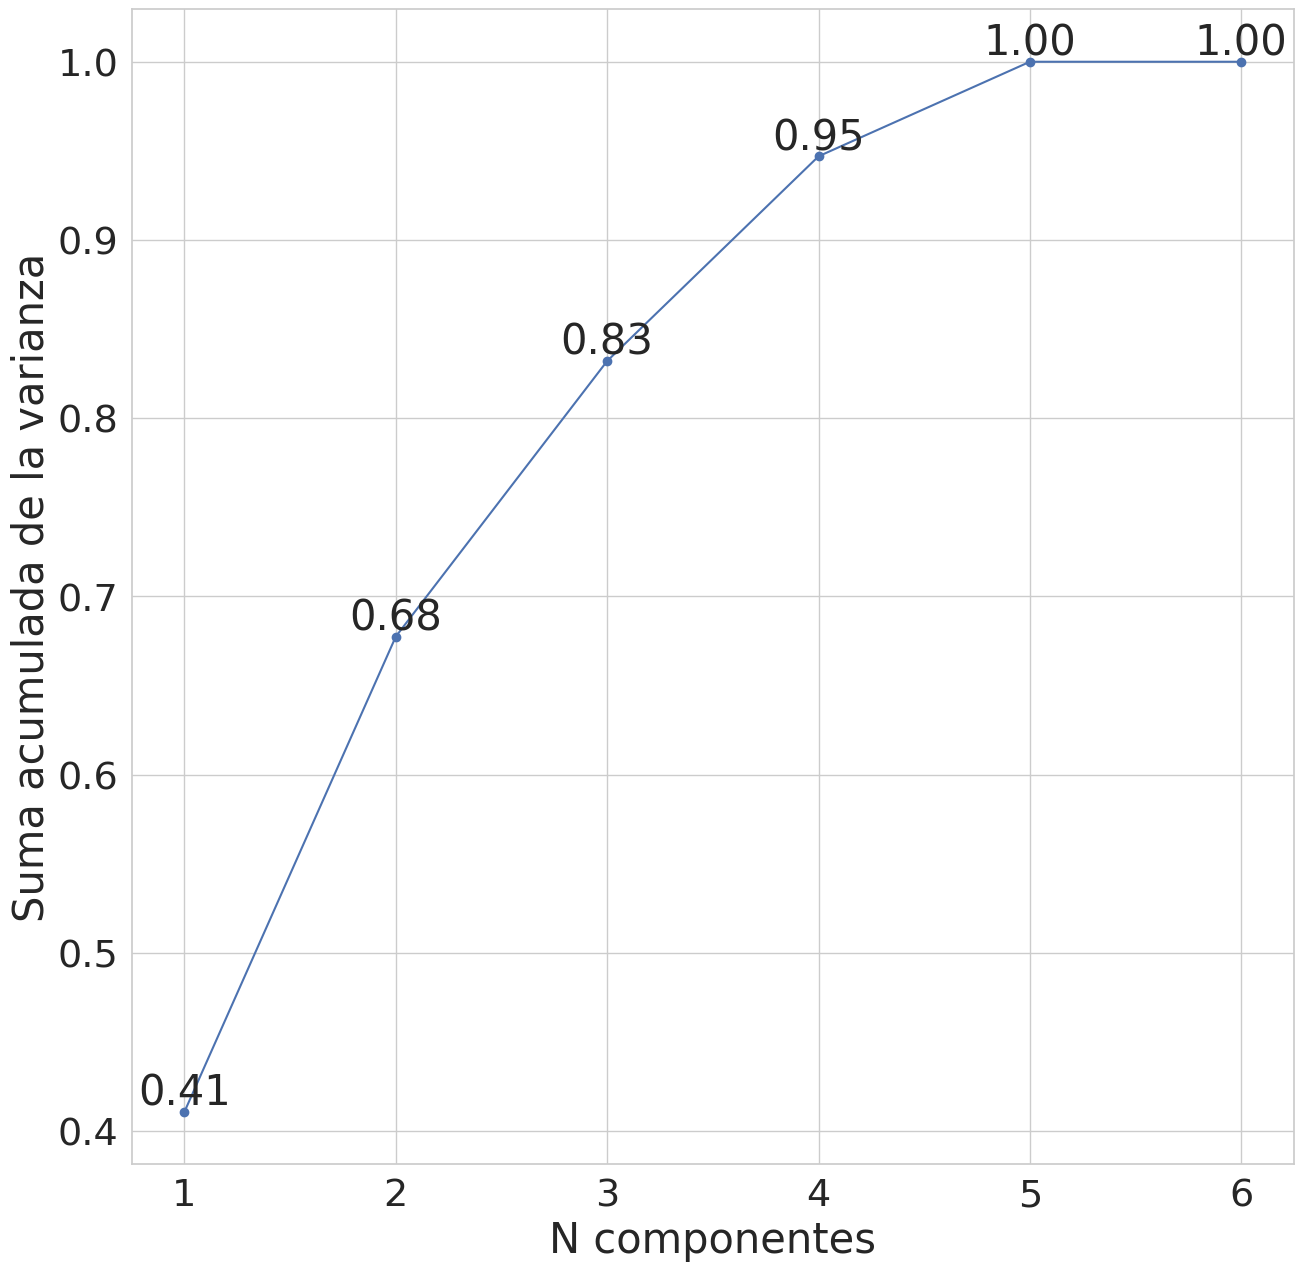

In [ ]:
# Crear la gráfica
plt.figure(figsize=(15,15))
cumsum_varianza = np.cumsum(ar_varianza)
plt.plot(range(1, len(cumsum_varianza) + 1), cumsum_varianza, marker='o')
plt.xlabel('N componentes')
plt.ylabel('Suma acumulada de la varianza')

# Agregar anotaciones con los valores
for i, value in enumerate(cumsum_varianza):
    plt.annotate(f'{value:.2f}', (i + 1, value), textcoords="offset points", xytext=(0,5), ha='center')
plt.show()


#plt.plot(np.cumsum(ar_varianza))
#plt.xlabel('N componentes')
#plt.ylabel('Suma acumulada de la varianza')
#plt.show()

In [ ]:
ar_Pca_suma=np.cumsum(ar_varianza)

In [ ]:
np.where((ar_Pca_suma>0.8) & (ar_Pca_suma<0.9))

(array([2]),)

#### En este caso, con 3 componente tenemos más del 80% de la varianza y con 4 componentes tenemos más del 90%, para este caso seleccionamos 4 componentes.

In [ ]:
pca_v2=PCA(n_components=4)
pca_valor1=pca_v2.fit_transform(std_train)
pca_v2

PCA(n_components=4)

In [ ]:
std_train.shape

(373, 6)

In [ ]:
pca_valor1.shape

(373, 4)

In [ ]:
pca_v2.explained_variance_#contienes los valores propios

array([2.47217286, 1.60398331, 0.93002582, 0.69081183])

In [ ]:
pca_v2.components_ #contiene los vectores propios

array([[ 0.51497192, -0.03089217,  0.41719706, -0.36667554, -0.40018644,
        -0.51497192],
       [-0.43761214, -0.39783156,  0.44658012, -0.15996153, -0.48342506,
         0.43761214],
       [-0.20511133,  0.83379126,  0.10388675, -0.45287771, -0.06899372,
         0.20511133],
       [ 0.03234371,  0.37921807,  0.35170211,  0.79668564, -0.3093526 ,
        -0.03234371]])

In [ ]:
df_pca_loading = pd.DataFrame(pca_valor1, columns=[f'PC{i}' for i in range(1,5)])

In [ ]:
df_pca_loading

,PC1,PC2,PC3,PC4
0,1.239589,-1.084412,-0.311272,-0.970061
1,1.060629,-1.415054,-0.184517,-1.545286
2,1.859632,0.144117,-1.166186,0.432644
3,1.541591,-0.415580,-0.979352,-0.483100
4,2.314780,0.426866,-0.719965,-0.234917
...,...,...,...,...
368,1.686433,-0.887616,0.413747,-0.363199
369,2.092474,-0.542101,0.683387,-0.602710
370,-2.196104,-0.025767,-1.111349,0.769904
371,-2.146667,-0.004201,-1.050289,0.662491


In [ ]:
#Creacion del CSV de datos que entrega el PCA
df_pca_loading.to_csv('df_pca_loading.csv', index=False)

In [ ]:
encoder = LabelEncoder()
df['Group'] = encoder.fit_transform(df['Group'])

In [ ]:
df['Group']

0      2
1      2
2      1
3      1
4      1
      ..
368    1
369    1
370    2
371    2
372    2
Name: Group, Length: 373, dtype: int64

In [ ]:
explained_variance = pca_v2.explained_variance_ratio_
total_explained_variance = sum(explained_variance)
print(f'Varianza explicada por las primeras componentes principales: \n{explained_variance}')
print(f'Varianza explicada acumulada: {total_explained_variance}')

Varianza explicada por las primeras componentes principales: 
[0.41092417 0.26661385 0.15458874 0.11482663]
Varianza explicada acumulada: 0.9469533961357217


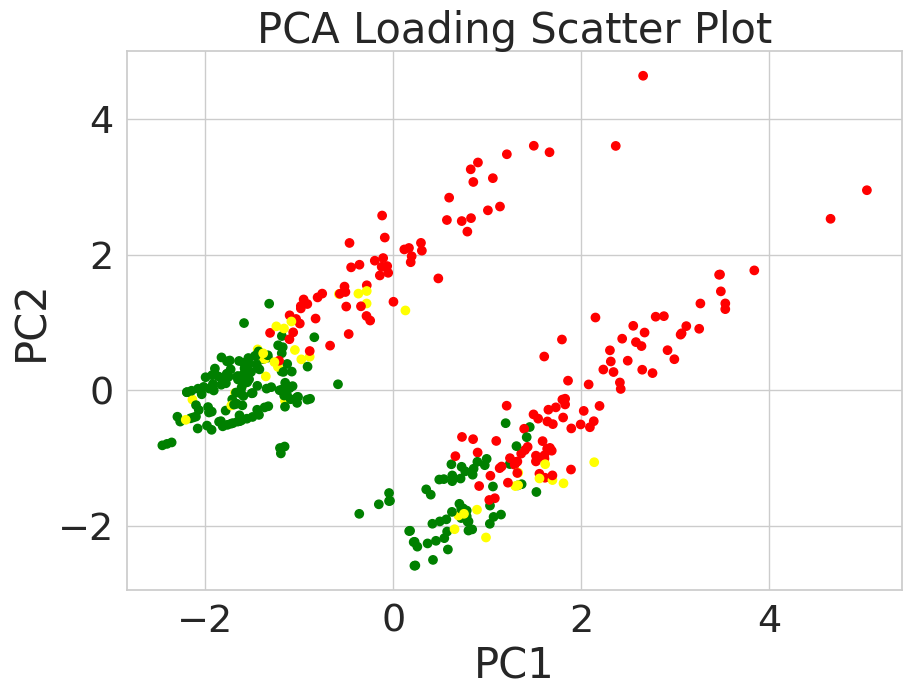

In [ ]:
# que 'Group' tiene los valores: 1'demented', 2'no demented', 0'converted'

# Definir una paleta de colores personalizada
palette = {
    0: 'yellow',
    1: 'red',
    2: 'green'
}

# Mapear los valores de 'Group' a los colores definidos en la paleta
colors = df['Group'].map(palette)

# Graficar el scatter plot con colores personalizados
plt.figure(figsize=(10, 7))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(df_pca_loading['PC1'], df_pca_loading['PC2'], c=colors)
plt.title('PCA Loading Scatter Plot')
plt.show()


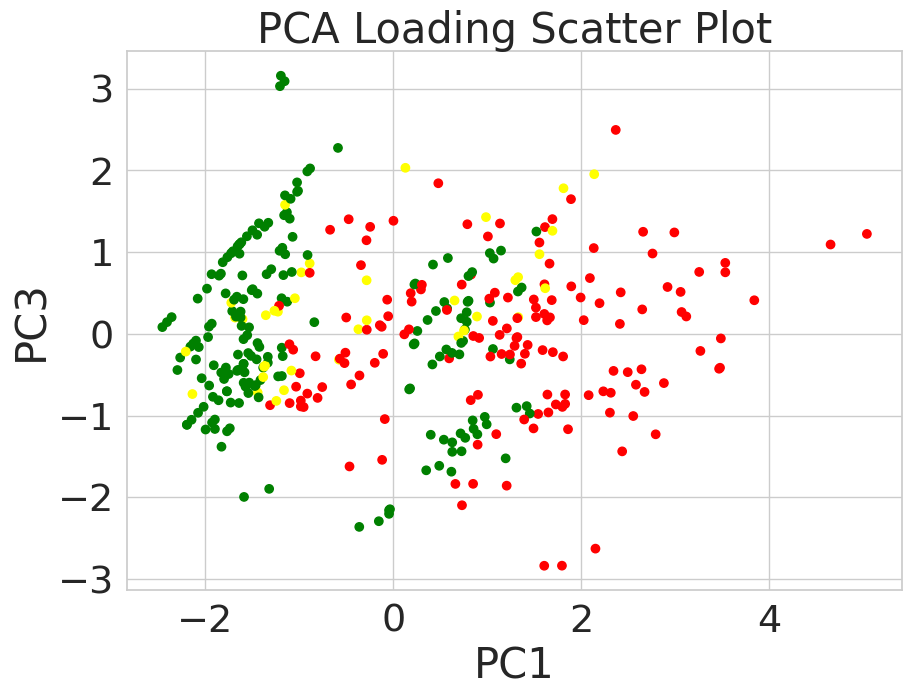

In [ ]:
# que 'Group' tiene los valores: 1'demented', 2'no demented', 0'converted'

# Definir una paleta de colores personalizada
palette = {
    0: 'yellow',
    1: 'red',
    2: 'green'
}

# Mapear los valores de 'Group' a los colores definidos en la paleta
colors = df['Group'].map(palette)

# Graficar el scatter plot con colores personalizados
plt.figure(figsize=(10, 7))
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.scatter(df_pca_loading['PC1'], df_pca_loading['PC3'], c=colors)
plt.title('PCA Loading Scatter Plot')
plt.show()

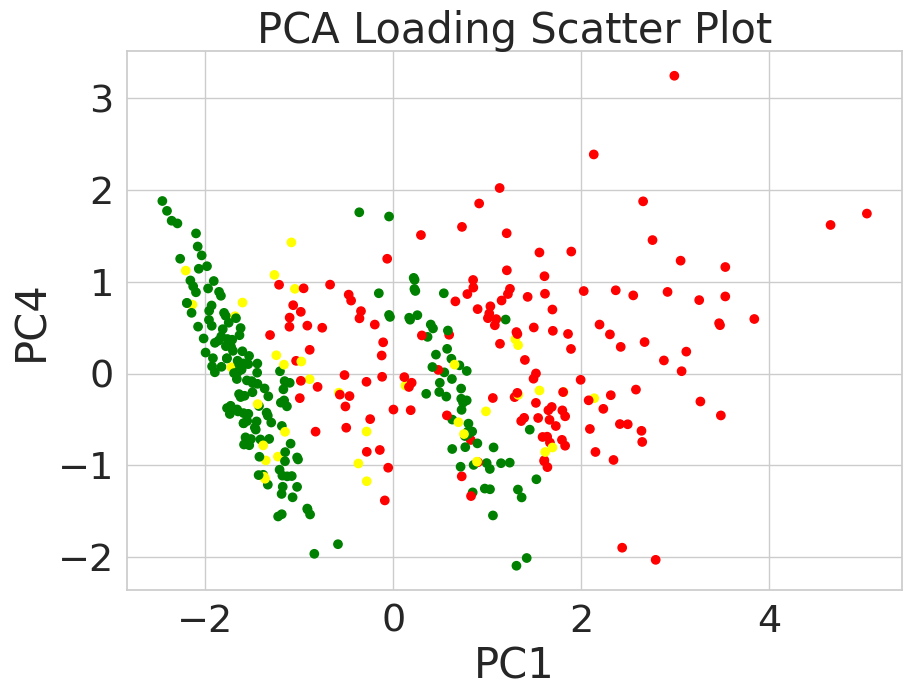

In [ ]:
# que 'Group' tiene los valores: 1'demented', 2'no demented', 0'converted'

# Definir una paleta de colores personalizada
palette = {
    0: 'yellow',
    1: 'red',
    2: 'green'
}

# Mapear los valores de 'Group' a los colores definidos en la paleta
colors = df['Group'].map(palette)

# Graficar el scatter plot con colores personalizados
plt.figure(figsize=(10, 7))
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.scatter(df_pca_loading['PC1'], df_pca_loading['PC4'], c=colors)
plt.title('PCA Loading Scatter Plot')
plt.show()

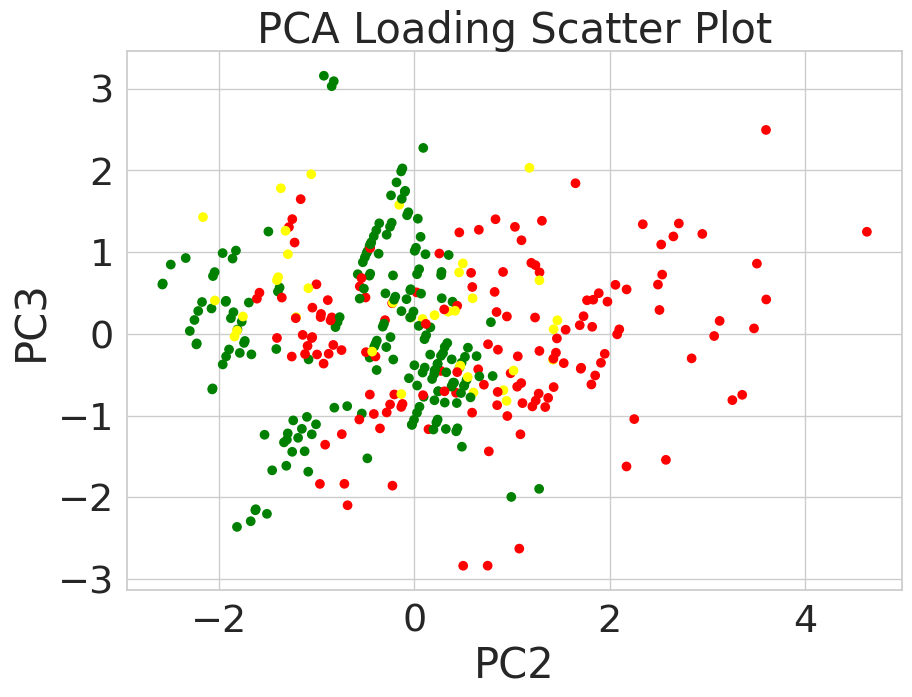

In [ ]:
# que 'Group' tiene los valores: 1'demented', 2'no demented', 0'converted'

# Definir una paleta de colores personalizada
palette = {
    0: 'yellow',
    1: 'red',
    2: 'green'
}

# Mapear los valores de 'Group' a los colores definidos en la paleta
colors = df['Group'].map(palette)

# Graficar el scatter plot con colores personalizados
plt.figure(figsize=(10, 7))
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.scatter(df_pca_loading['PC2'], df_pca_loading['PC3'], c=colors)
plt.title('PCA Loading Scatter Plot')
plt.show()

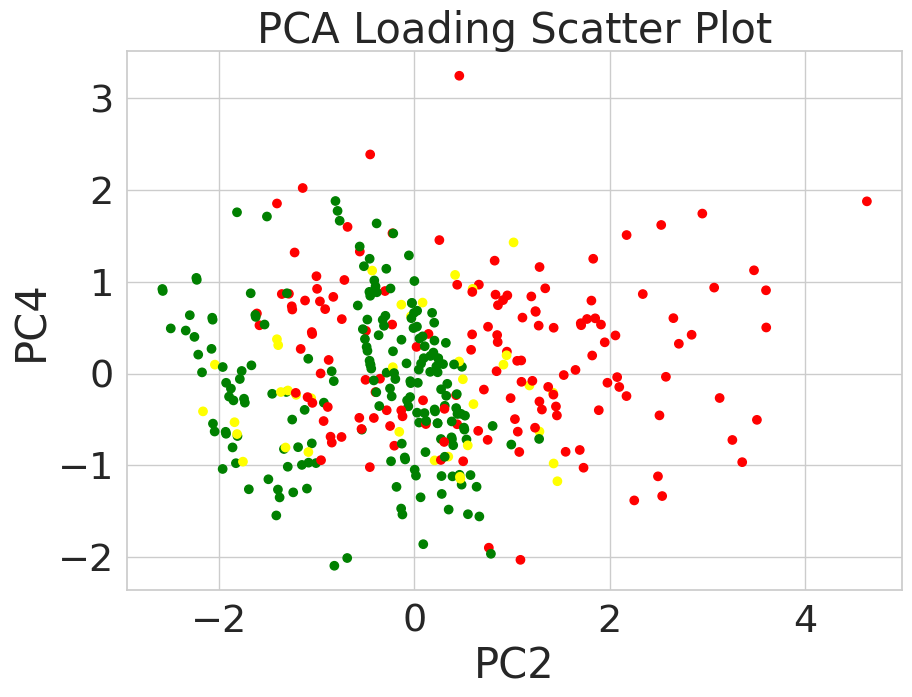

In [ ]:
# que 'Group' tiene los valores: 1'demented', 2'no demented', 0'converted'

# Definir una paleta de colores personalizada
palette = {
    0: 'yellow',
    1: 'red',
    2: 'green'
}

# Mapear los valores de 'Group' a los colores definidos en la paleta
colors = df['Group'].map(palette)

# Graficar el scatter plot con colores personalizados
plt.figure(figsize=(10, 7))
plt.xlabel('PC2')
plt.ylabel('PC4')
plt.scatter(df_pca_loading['PC2'], df_pca_loading['PC4'], c=colors)
plt.title('PCA Loading Scatter Plot')
plt.show()

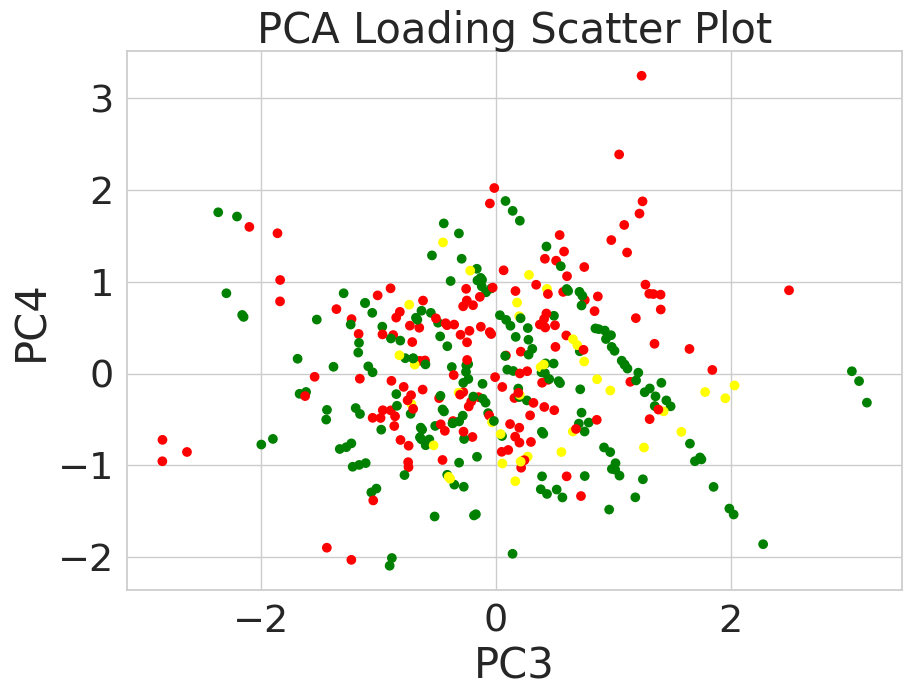

In [ ]:
# que 'Group' tiene los valores: 1'demented', 2'no demented', 0'converted'

# Definir una paleta de colores personalizada
palette = {
    0: 'yellow',
    1: 'red',
    2: 'green'
}

# Mapear los valores de 'Group' a los colores definidos en la paleta
colors = df['Group'].map(palette)

# Graficar el scatter plot con colores personalizados
plt.figure(figsize=(10, 7))
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.scatter(df_pca_loading['PC3'], df_pca_loading['PC4'], c=colors)
plt.title('PCA Loading Scatter Plot')
plt.show()

# Kmeans
## Aplicacion del kmeans para las tres variables del PCA

In [ ]:
columna1 = 'PC1'
columna2 = 'PC2'
columna3 = 'PC3'

In [ ]:
data = df_pca_loading[[columna1,columna2,columna3]]
data.reset_index(drop=True, inplace=True)

data.head(200)

,PC1,PC2,PC3
0,1.239589,-1.084412,-0.311272
1,1.060629,-1.415054,-0.184517
2,1.859632,0.144117,-1.166186
3,1.541591,-0.415580,-0.979352
4,2.314780,0.426866,-0.719965
...,...,...,...
195,-0.578632,1.419892,-0.314866
196,-1.931746,-0.311859,0.125812
197,-1.961408,-0.324799,0.089176
198,0.839638,-2.046684,0.756745


### Cuantos clusters? método Elbow

In [ ]:
# Encontrar el número de clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

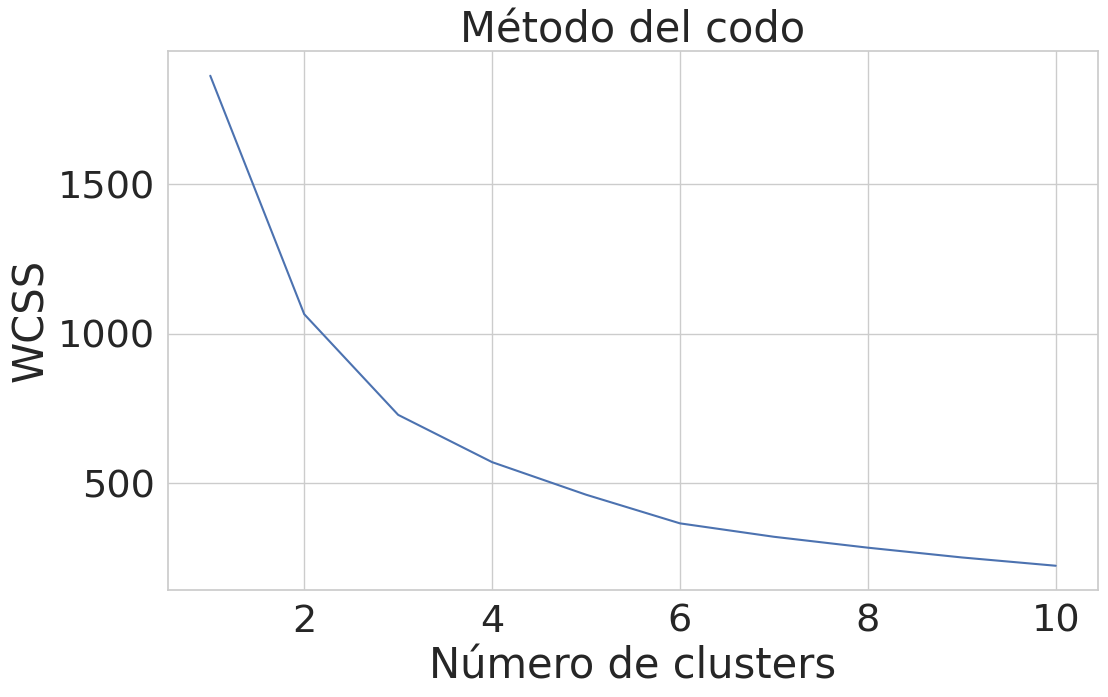

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

## Definicion de clusters K-means

In [ ]:
import warnings
xn_clusters = 4

warnings.filterwarnings('ignore')
kmeans = KMeans(n_clusters = xn_clusters, init = "k-means++", random_state = 42).fit(data)
data['cluster'] = kmeans.labels_
data.tail()

,PC1,PC2,PC3,cluster
368,1.686433,-0.887616,0.413747,1
369,2.092474,-0.542101,0.683387,1
370,-2.196104,-0.025767,-1.111349,0
371,-2.146667,-0.004201,-1.050289,0
372,-2.196104,-0.025767,-1.111349,0


In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=['PC1', 'PC2','PC3'])
centers['freq'] = data['cluster'].value_counts()
centers['freq_r'] = data['cluster'].value_counts(normalize=True)
print(centers)

        PC1       PC2       PC3  freq    freq_r
0 -1.511926  0.138260  0.136127   163  0.436997
1  1.025354 -1.345376 -0.187883   119  0.319035
2  0.241002  2.133932  0.258650    50  0.134048
3  2.740897  0.752849 -0.311296    41  0.109920


## metricas de evaluacion

In [ ]:
# Muestra el valor de la inertia o WCSS
inertia = kmeans.inertia_
print(f'WCSS: {inertia}')
silhouette_avg = silhouette_score(std_train, kmeans.labels_)
print(f'Coeficiente de silueta promedio: {silhouette_avg}')
centroids = kmeans.cluster_centers_
dist_matrix = cdist(centroids, centroids, 'euclidean')
dist_df = pd.DataFrame(dist_matrix, columns=[f'Cluster {i+1}' for i in range(len(centroids))])
dist_df.index = [f'Cluster {i+1}' for i in range(len(centroids))]

# Mostrar el DataFrame
dist_df

WCSS: 569.6957600596354
Coeficiente de silueta promedio: 0.36469433718963046


,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Cluster 1,0.000000,2.957016,2.659037,4.320233
Cluster 2,2.957016,0.000000,3.594465,2.713092
Cluster 3,2.659037,3.594465,0.000000,2.912336
Cluster 4,4.320233,2.713092,2.912336,0.000000


## Visualización

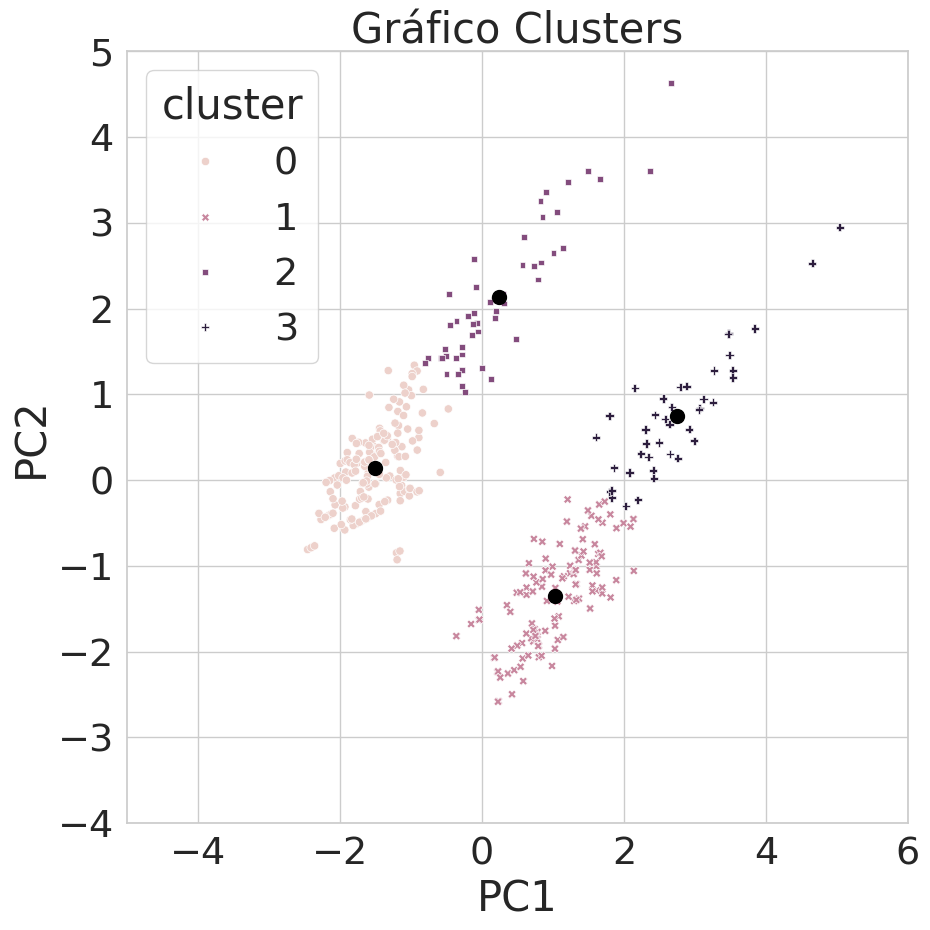

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x=columna1, y=columna2, hue='cluster', style='cluster',
                     ax=ax, data=data)
ax.set_xlim(-5, 6)
ax.set_ylim(-4, 5)
centers.plot.scatter(x=columna1, y=columna2, ax=ax, s=100, color='black')
plt.title('Gráfico Clusters')
plt.tight_layout()
plt.show()

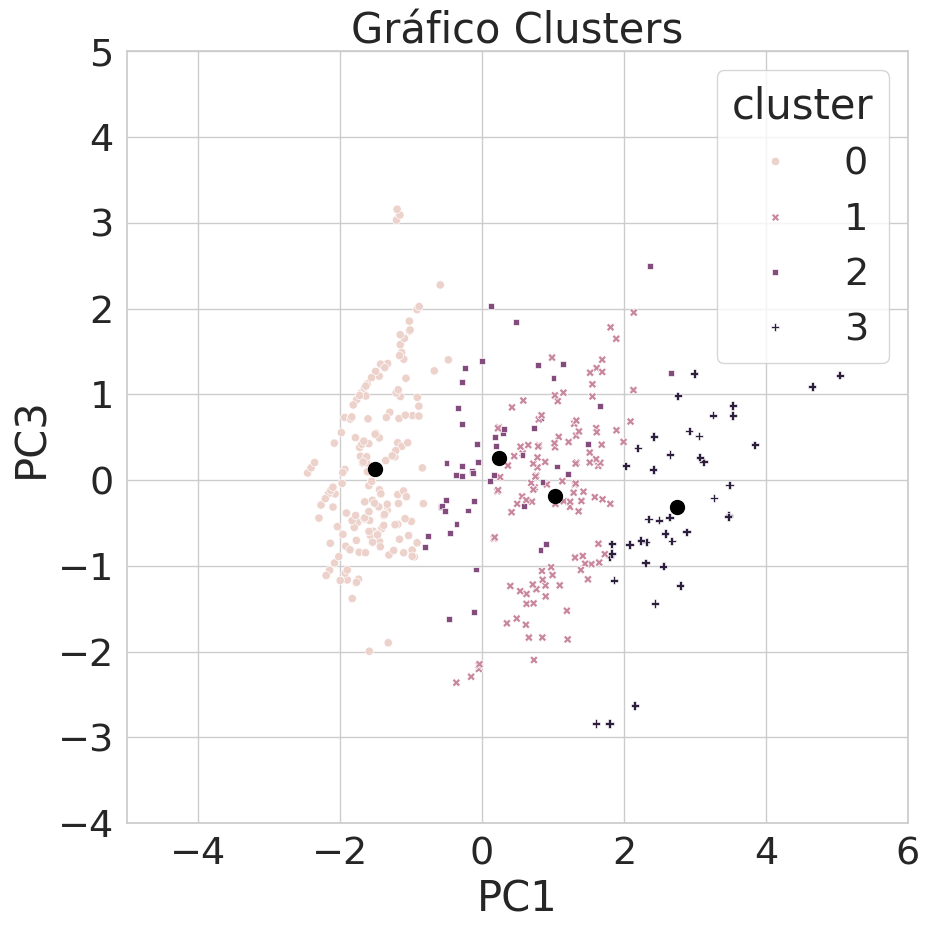

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x=columna1, y=columna3, hue='cluster', style='cluster',
                     ax=ax, data=data)
ax.set_xlim(-5, 6)
ax.set_ylim(-4, 5)
centers.plot.scatter(x=columna1, y=columna3, ax=ax, s=100, color='black')
plt.title('Gráfico Clusters')
plt.tight_layout()
plt.show()

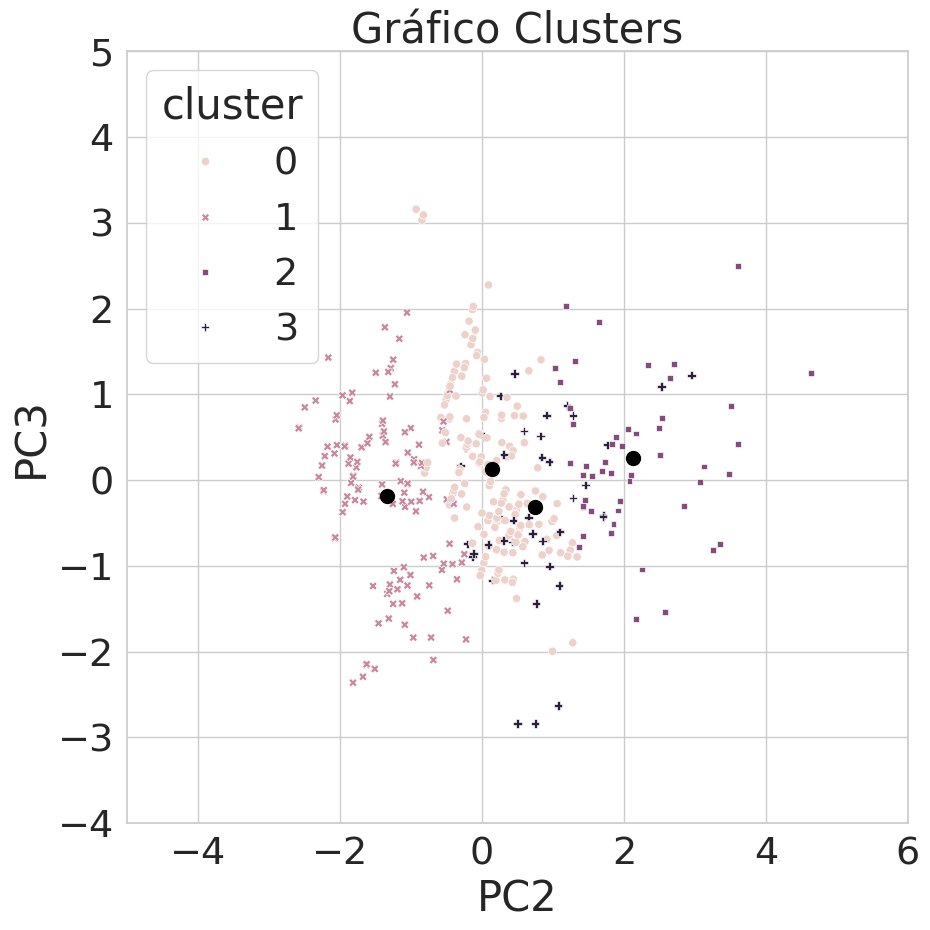

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x=columna2, y=columna3, hue='cluster', style='cluster',
                     ax=ax, data=data)
ax.set_xlim(-5, 6)
ax.set_ylim(-4, 5)
centers.plot.scatter(x=columna2, y=columna3, ax=ax, s=100, color='black')
plt.title('Gráfico Clusters')
plt.tight_layout()
plt.show()

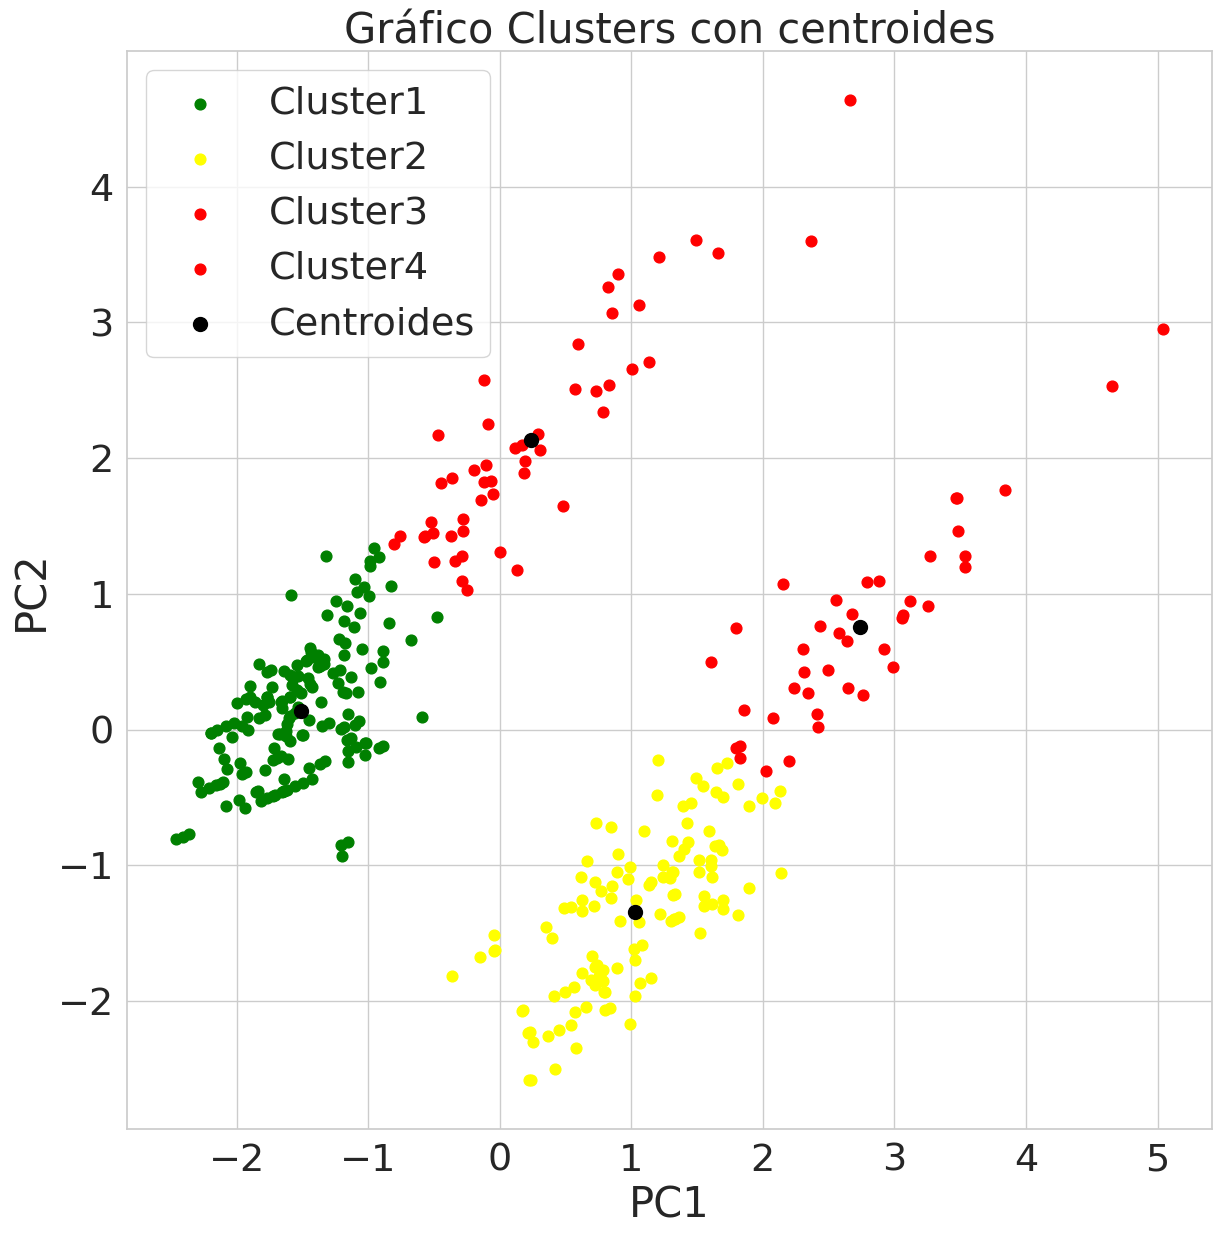

In [ ]:
plt.figure(figsize=(14, 14))
plt.scatter(data[data['cluster']==0][columna1], data[data['cluster']==0][columna2], s = 60, c = 'green', label = 'Cluster1')
plt.scatter(data[data['cluster']==1][columna1], data[data['cluster']==1][columna2], s = 60, c = 'yellow', label = 'Cluster2')
plt.scatter(data[data['cluster']==2][columna1], data[data['cluster']==2][columna2], s = 60, c = 'red', label = 'Cluster3')
plt.scatter(data[data['cluster']==3][columna1], data[data['cluster']==3][columna2], s = 60, c = 'red', label = 'Cluster4')
#plt.scatter(data[data['cluster']==4][columna1], data[data['cluster']==4][columna2], s = 60, c = 'black', label = 'Cluster5')
#plt.scatter(data[data['cluster']==5][columna1], data[data['cluster']==5][columna2], s = 60, c = 'pink', label = 'Cluster6')
plt.scatter(centers[columna1], centers[columna2], s = 100, c = 'black', label = 'Centroides')
plt.title('Gráfico Clusters con centroides')
plt.xlabel(columna1)
plt.ylabel(columna2)
plt.legend()
plt.show()

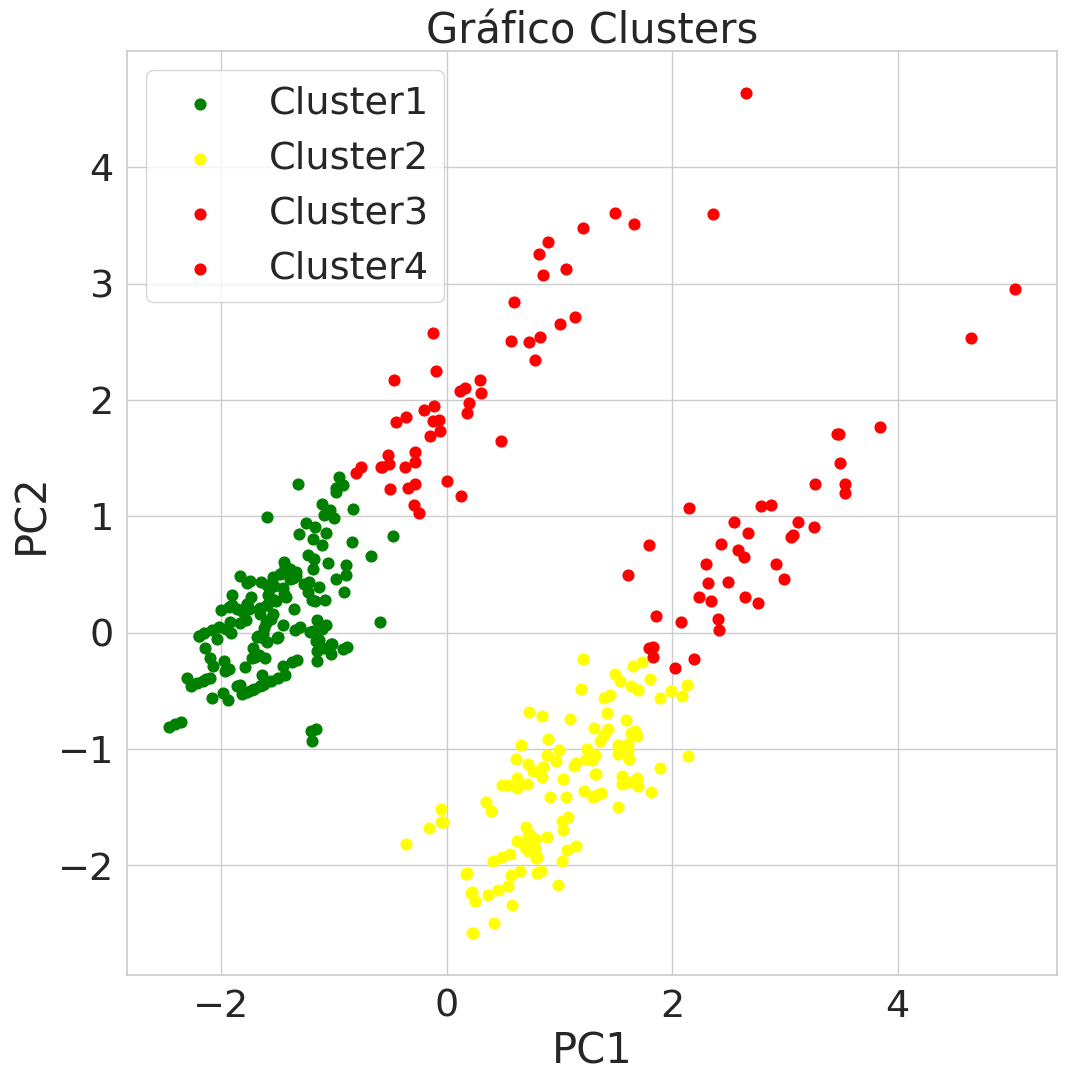

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(data[data['cluster']==0][columna1], data[data['cluster']==0][columna2], s = 60, c = 'green', label = 'Cluster1')
plt.scatter(data[data['cluster']==1][columna1], data[data['cluster']==1][columna2], s = 60, c = 'yellow', label = 'Cluster2')
plt.scatter(data[data['cluster']==2][columna1], data[data['cluster']==2][columna2], s = 60, c = 'red', label = 'Cluster3')
plt.scatter(data[data['cluster']==3][columna1], data[data['cluster']==3][columna2], s = 60, c = 'red', label = 'Cluster4')
#plt.scatter(data[data['cluster']==4][columna1], data[data['cluster']==4][columna2], s = 60, c = 'black', label = 'Cluster5')
#plt.scatter(data[data['cluster']==5][columna1], data[data['cluster']==5][columna2], s = 60, c = 'pink', label = 'Cluster6')
#plt.scatter(centers[columna1], centers[columna2], s = 100, c = 'black', label = 'Centroids')
plt.title('Gráfico Clusters')
plt.xlabel(columna1)
plt.ylabel(columna2)
plt.legend()
plt.show()